<a href="https://colab.research.google.com/github/kaushal3312/TimeSeriesData/blob/main/wattsight_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


In [2]:
import yfinance as yf 
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import datetime    

In [3]:
rwe = yf.Ticker('RWE.DE')
eongy = yf.Ticker('EONGY')
print(rwe)
print(eongy)

yfinance.Ticker object <RWE.DE>
yfinance.Ticker object <EONGY>


In [4]:
start = datetime.datetime(2018, 12, 31)
end = datetime.datetime(2020, 1, 1)
df = yf.download('RWE.DE EONGY', start, end)
dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])

    newdate = newdate[0:10]
    dates.append(newdate)

df['dates'] = dates


[*********************100%***********************]  2 of 2 completed


In [5]:
df.head()


Adj Close             Close  ...    Volume                  dates
               EONGY     RWE.DE  EONGY  ...     EONGY     RWE.DE            
Date                                    ...                                 
2018-12-31  8.987103        NaN   9.87  ...  402700.0        NaN  2018-12-31
2019-01-02  9.169211  17.217455  10.07  ...   98400.0  4291989.0  2019-01-02
2019-01-03  9.314898  17.418179  10.23  ...  142600.0  3622844.0  2019-01-03
2019-01-04  9.433270  17.775019  10.36  ...  124900.0  3288528.0  2019-01-04
2019-01-07  9.351322  17.752714  10.27  ...  192400.0  3042945.0  2019-01-07

[5 rows x 13 columns]

In [6]:
df.tail()

Adj Close             Close  ...    Volume                  dates
                EONGY     RWE.DE  EONGY  ...     EONGY     RWE.DE            
Date                                     ...                                 
2019-12-24   9.971957        NaN  10.45  ...   32400.0        NaN  2019-12-24
2019-12-26  10.067384        NaN  10.55  ...  116600.0        NaN  2019-12-26
2019-12-27  10.162808  24.912785  10.65  ...  146500.0  1368804.0  2019-12-27
2019-12-30  10.134181  25.179773  10.62  ...   53000.0  1721932.0  2019-12-30
2019-12-31  10.181893        NaN  10.67  ...   58100.0        NaN  2019-12-31

[5 rows x 13 columns]

In [7]:
actual_df = df['Close']

In [8]:
actual_df

,EONGY,RWE.DE
Date,,
2018-12-31,9.87,NaN
2019-01-02,10.07,19.299999
2019-01-03,10.23,19.525000
2019-01-04,10.36,19.924999
2019-01-07,10.27,19.900000
...,...,...
2019-12-24,10.45,NaN
2019-12-26,10.55,NaN
2019-12-27,10.65,27.059999


In [9]:
actual_df.reset_index(inplace=True,drop=False)


In [10]:
actual_df


,Date,EONGY,RWE.DE
0,2018-12-31,9.87,NaN
1,2019-01-02,10.07,19.299999
2,2019-01-03,10.23,19.525000
3,2019-01-04,10.36,19.924999
4,2019-01-07,10.27,19.900000
...,...,...,...
254,2019-12-24,10.45,NaN
255,2019-12-26,10.55,NaN
256,2019-12-27,10.65,27.059999
257,2019-12-30,10.62,27.350000


In [11]:
actual_df = actual_df.rename(columns={"EONGY": "actual_EON", "RWE.DE": "actual_RWE"})

In [12]:
url = 'https://raw.githubusercontent.com/kaushal3312/TimeSeriesData/main/model_results.csv'
pred_df = pd.read_csv(url)

In [13]:
pred_df = pred_df.drop(columns='Date')

In [14]:
pred_df

,model_eon,model_rwe
0,10.000116,NaN
1,10.055719,18.128063
2,9.990220,18.354213
3,9.994109,18.341403
4,9.950292,18.117569
...,...,...
254,11.940119,NaN
255,12.004202,NaN
256,12.090594,21.909176
257,11.871587,21.943049


In [15]:
pred_df = pred_df.rename(columns={"model_eon": "pred_EON", "model_rwe": "pred_RWE"})

In [16]:
actual_df

,Date,actual_EON,actual_RWE
0,2018-12-31,9.87,NaN
1,2019-01-02,10.07,19.299999
2,2019-01-03,10.23,19.525000
3,2019-01-04,10.36,19.924999
4,2019-01-07,10.27,19.900000
...,...,...,...
254,2019-12-24,10.45,NaN
255,2019-12-26,10.55,NaN
256,2019-12-27,10.65,27.059999
257,2019-12-30,10.62,27.350000


In [17]:
pred_df

,pred_EON,pred_RWE
0,10.000116,NaN
1,10.055719,18.128063
2,9.990220,18.354213
3,9.994109,18.341403
4,9.950292,18.117569
...,...,...
254,11.940119,NaN
255,12.004202,NaN
256,12.090594,21.909176
257,11.871587,21.943049


In [18]:
frames = [actual_df,pred_df]


In [19]:
combined_df = pd.concat(frames,axis=1)


In [20]:
combined_df

,Date,actual_EON,actual_RWE,pred_EON,pred_RWE
0,2018-12-31,9.87,NaN,10.000116,NaN
1,2019-01-02,10.07,19.299999,10.055719,18.128063
2,2019-01-03,10.23,19.525000,9.990220,18.354213
3,2019-01-04,10.36,19.924999,9.994109,18.341403
4,2019-01-07,10.27,19.900000,9.950292,18.117569
...,...,...,...,...,...
254,2019-12-24,10.45,NaN,11.940119,NaN
255,2019-12-26,10.55,NaN,12.004202,NaN
256,2019-12-27,10.65,27.059999,12.090594,21.909176
257,2019-12-30,10.62,27.350000,11.871587,21.943049


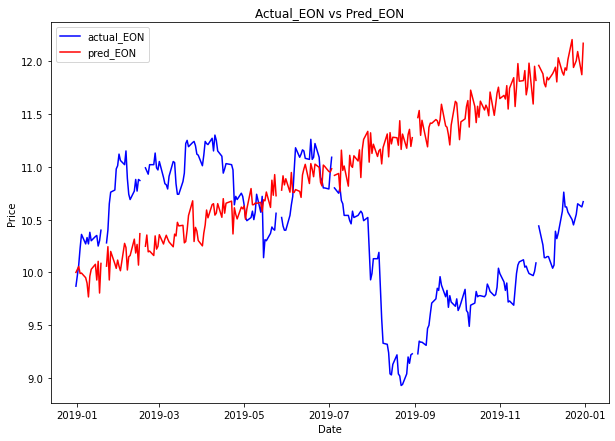

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(combined_df['Date'], combined_df['actual_EON'], 'b-')
plt.plot(combined_df['Date'], combined_df['pred_EON'], 'r-')
plt.legend(['actual_EON', 'pred_EON'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual_EON vs Pred_EON');
plt.show()

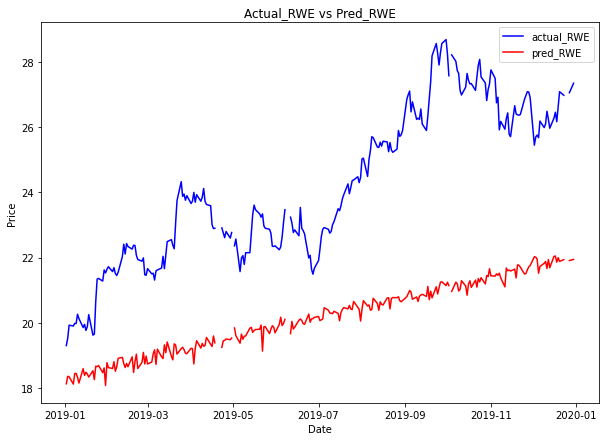

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(combined_df['Date'], combined_df['actual_RWE'], 'b-')
plt.plot(combined_df['Date'], combined_df['pred_RWE'], 'r-')
plt.legend(['actual_RWE', 'pred_RWE'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual_RWE vs Pred_RWE');
plt.show()

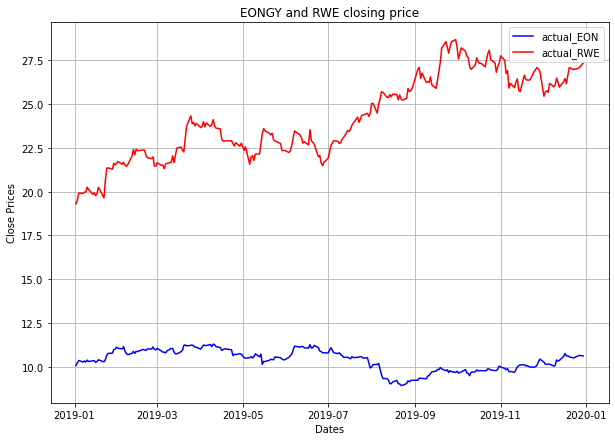

In [64]:
#plot close price
plt.figure(figsize=(10,7))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(combined_df['Date'], combined_df['actual_EON'], 'b-')
plt.plot(combined_df['Date'], combined_df['actual_RWE'], 'r-')
plt.legend(['actual_EON', 'actual_RWE'])
plt.title('EONGY and RWE closing price')
plt.show()

In [23]:
rwe = ax.bar(index, combined_df[""].value_counts(), bar_width,
                label="Summer")

eongy = ax.bar(index+bar_width, df["Crime Type Winter"].value_counts(),
                 bar_width, label="Winter")

In [33]:
combined_df = combined_df.dropna()

In [34]:
combined_df

,Date,actual_EON,actual_RWE,pred_EON,pred_RWE
1,2019-01-02,10.07,19.299999,10.055719,18.128063
2,2019-01-03,10.23,19.525000,9.990220,18.354213
3,2019-01-04,10.36,19.924999,9.994109,18.341403
4,2019-01-07,10.27,19.900000,9.950292,18.117569
5,2019-01-08,10.33,19.980000,9.898642,18.437733
...,...,...,...,...,...
251,2019-12-19,10.62,26.620001,11.914788,21.997452
252,2019-12-20,10.57,27.090000,12.014980,21.881554
253,2019-12-23,10.50,26.980000,12.203933,21.937456
256,2019-12-27,10.65,27.059999,12.090594,21.909176


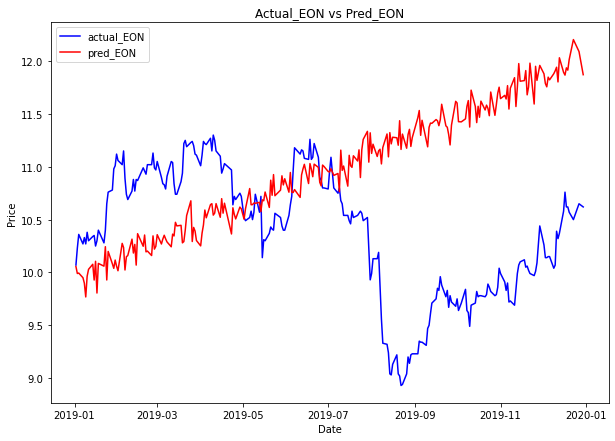

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(combined_df['Date'], combined_df['actual_EON'], 'b-')
plt.plot(combined_df['Date'], combined_df['pred_EON'], 'r-')
plt.legend(['actual_EON', 'pred_EON'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual_EON vs Pred_EON');
plt.show()

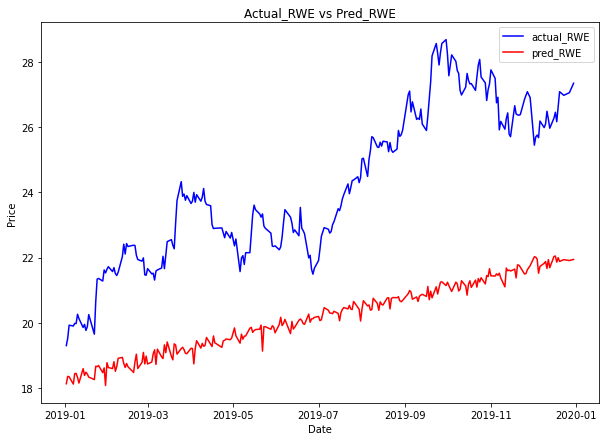

In [36]:
plt.figure(figsize=(10, 7))
plt.plot(combined_df['Date'], combined_df['actual_RWE'], 'b-')
plt.plot(combined_df['Date'], combined_df['pred_RWE'], 'r-')
plt.legend(['actual_RWE', 'pred_RWE'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual_RWE vs Pred_RWE');
plt.show()

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error



**R2 Score**

In [46]:
r2_rwe = r2_score(combined_df['actual_RWE'], combined_df['pred_RWE'])

In [49]:
r2_rwe

-2.3541673771655627

In [47]:
r2_eon = r2_score(combined_df['actual_EON'], combined_df['pred_EON'])

In [48]:
r2_eon

-3.117978989034719

**Mean absolute error**

In [53]:
print(mean_absolute_error(combined_df['actual_EON'], combined_df['pred_EON']))


0.9983502544379731


In [55]:
print(mean_absolute_error(combined_df['actual_RWE'], combined_df['pred_RWE']))


4.0116109613856805


***Median Absolute error ***

In [57]:
print(median_absolute_error(combined_df['actual_EON'], combined_df['pred_EON']))


0.7692007544504911


In [58]:
print(median_absolute_error(combined_df['actual_RWE'], combined_df['pred_RWE']))


3.8503507037238798


**Mean squared error**

In [60]:
print(mean_squared_error(combined_df['actual_EON'], combined_df['pred_EON']))


1.4858220794151042


In [62]:
print(mean_squared_error(combined_df['actual_RWE'], combined_df['pred_RWE']))


18.29584749976748


  ( 2 ) 
  
  
After we compare the actual and the predicted closing prices , plotting the graph and doing the metrics evaluation, we can say that EONGY model performed better compared to RWE.DE model. In RWE stock comparision graph of actual and predicted closing price for 2019 , the predictions did not matched with the actual closing prices. The model perofmed worst in this case. While in EON model , some of them were mathced and the model is not good but better than RWE.  

(3) 

Looking back at both the stocks for 2019, the RWE stock peroformed better than EONGY in 2019 as we can see clearly from the graph that EONGY faced a majot downfall and then at the end of the year the closing prices are almost similar to beggining of the year while in RWE stock, the closing prices are increased compared to the beginning of the year. 

( 4) 

We aim to predict the daily closing price for a stock using data from previous N days. Eg- Lets say 3 years of historical prices.Then download the split the dataset into 60% train, 20% validation, 20% test. Model will be trained using the train set , model hyperparameters will be tuned using validation set , and finally the perofrmance of the model will be reported using the test set. 

To evaluate the effectiveness of our methods, we will use root mean square ( RMSE) and mean absolute percentage error  ( MAPE ) metrics . For both the metrics , lower the value, better the predictions are. 

There are various methods we can apply like Last Value, Moving Average, Linear Regression, Extreme Gradient Descent, Long Short Term Memory. 

In Last Value Method, we simply set the prediction as last observed value. In our project , this means we set the current closing price as the previous day's closing price. This is basically used as the benchmark model and can be used to compare other models. This benchmark will help establish then intuition about faetures that are important and help prioritize further development. 